# Step 1

$$V_{kx} =V_{k}*cos(\theta_{k-1}+\omega*(t_{k}-t_{k-1})) $$

$$V_{ky} =V_{k}*sin(\theta_{k-1}+\omega*(t_{k}-t_{k-1})) $$

$$ P_{x} = \int_{k-1}^{k} V_{k}*cos(\theta_{k-1} + w*(t - t_{k-1})) \,dt = \frac{V_{k}*(sin(\theta_{k-1}+w*\delta_{t})-sin(\theta_{k-1}))}{w} $$

$$ P_{y} =\int_{k-1}^{k} V_{k}*sin(\theta_{k-1} + w*(t - t_{k-1})) \,dt = \frac{V_{k}*(-cos(\theta_{k-1}+w*\delta_{t})+cos(\theta_{k-1}))}{w} $$

$$ X_{k} = [t , v, w]^{T}$$

$$ Y_k = [t,P_x, P_y, \theta]^{T }$$

###  I use the X to represent the inputs and Y to represent the outputs. This model is not linear, there are moments when linear velocity and angular velocity coexist, then robot's trajectory would be nonlinear. 

# Step 2

###  For this question, there are five movements. I add one more stop movement that sets angular velocity and forward velocity zero. 

# Step 3

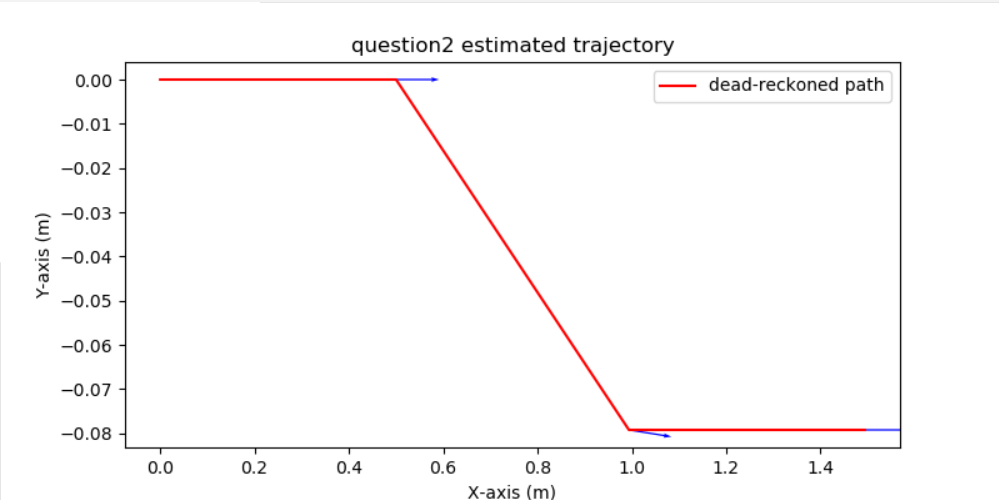

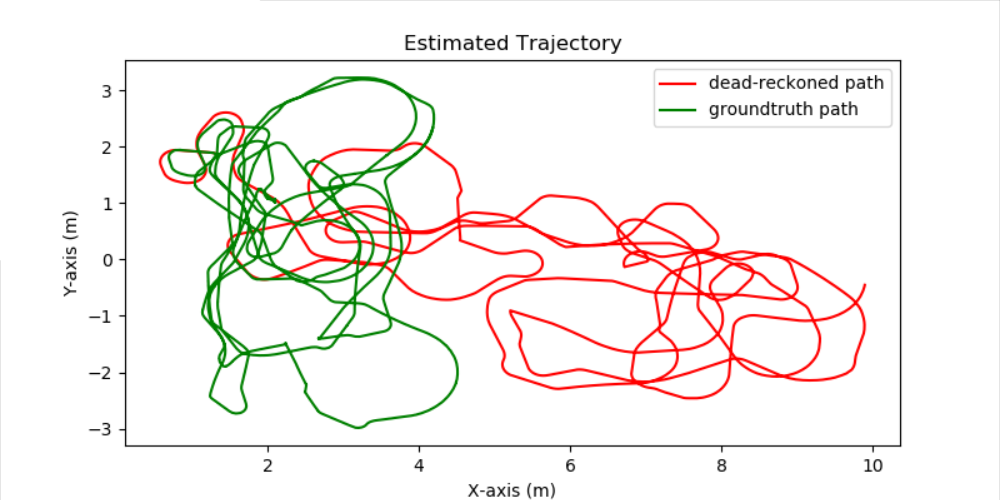

### The estimated  path distract a lot from the groundtruth path, this is probably caused by control errors, the ground frictions and odometry data. 

# Step 4

### For implementing the unscented kalman filter, I assume: 
#### 1. The state X is in gaussian distribution in 3 dimensions. 
#### 2. The control error R ~ N (0, Cov_R)
#### 3. The measurement error meets Q~N (0, Cov_Q)
#### 4. k-1 state the X posterior mean and covariance matrix Miu_X_k-1 and Cov_x_k-1
#### 5. the real measurement value z_k in state k

#### first, I calculate the predicted trajectory based on the Odometry data, then I pick up the points matched with the measure data time. I used those matched predicted trajectory points to calculate the corresponding measurement values Z_bar, then I input those values into whole algorithm and make estimations on the control and measurement covariance matrix R and Q

# Step 5

#### I could use the measurement data to other robots as my measurement model. Since the assignment doesn't provide informations about other robots. If I  design the measurement model, I could import other robotic's measurement data instead of only landmarks. Once the research robotics's camera captures' other robots, I could use other robots' groundtruth data to calculate the range and bearings. 

# Step 6

#### The distance for those three points are [8.094, 2.573, 5.063]
#### The headings are [-1.759, -1.206,1.107]

# Step 7

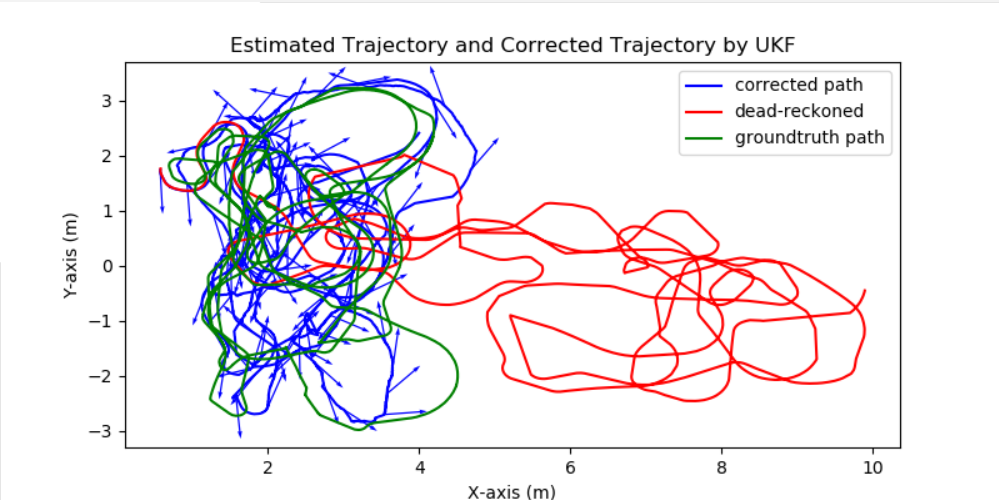

# Step 8

### The motion model performs well in ideal environments without any frictions, and it performs poorly  in real environments if only motion model is used in path estimations. Real-world systems are subject to various sources of error, noise, and uncertainty. Measurement data reflects the actual, observed behavior of the system, but it is often corrupted by noise. Kalman filters use this noisy measurement data to correct and refine the system's state estimate. By continuously updating the state estimate with new measurements, the filter reduces the impact of noise and provides a more accurate and stable estimate.

### In mathematical terms, the UKF captures the mean and covariance of the state distribution more accurately by considering terms beyond the first-order linear approximation:

$$\begin{align*}
\chi_t^0 & = x_t \\
\chi_t^i & = x_t + (\sqrt{(n+\lambda)P_t})_i, \quad i=1,2,\ldots,n \\
\chi_t^i & = x_t - (\sqrt{(n+\lambda)P_t})_{i-n}, \quad i=n+1, n+2, \ldots, 2n
\end{align*}$$

$$\hat{\chi}_{t+1}^i = f(\chi_t^i)$$

### The update step of the UKF similarly generates sigma points for measurements, predicts expected measurements using the measurement model, and updates the state estimate based on the actual measurements. The UKF combines the information from the prediction and update steps to provide an accurate and robust estimate of the state in the presence of nonlinearities and uncertainty


### Unscented Kalman filters not only estimate the state but also provide an estimate of the uncertainty (covariance) associated with that state estimate. Measurement data is used to update this covariance, reflecting the increasing or decreasing confidence in the state estimate. This information is valuable for decision-making and assessing the reliability of the filter's output.

$$K_{t+1} = P_{xz} (P_{zz})^{-1}$$
$$x_{t+1} = \hat{x}_{t+1} + K_{t+1} (z_{t+1} - \hat{z}_{t+1})$$
$$P_{t+1} = \hat{P}_{t+1} - K_{t+1} P_{zz} K_{t+1}^T$$

# Step 9

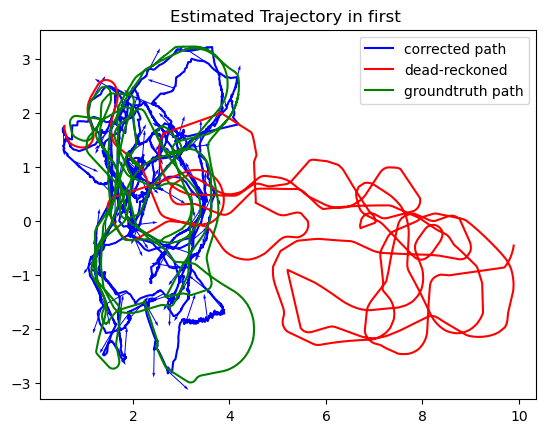

### Q = 0.01

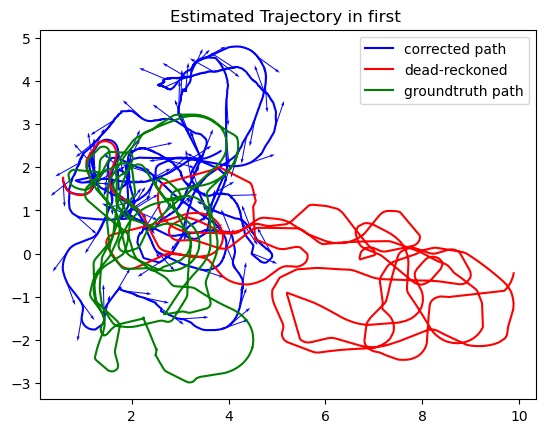

### Q= 0.5

#### The measurement error has a great impact on my filter path. once the q is decreasing, the plot would become zia-zagging, and once I increase the Q, the path would become smoother. I think that is reasonable, since the Q decides the noise level in the measurement level. Since we do not have the real value Q, once we set the noise level higher, which means the full filter will believe the measurement data less, and the trajectory will be smoother like the estimated trajectory. Once the noise level of Q decrease, the filter believes the measurement data more. Since the measurement data is capatured by different cameras, thus the positions could shift. 